## Traffic Volumes AADT for California State highway network

AADT (Annual Average Daily Traffic) collected by electronic counting instruments

Data obtained from https://data.ca.gov/dataset/traffic-volumes-aadt 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
import plotly.express as px

In [2]:
# Load the dataset
df = pd.read_csv('C:\\Users\\bukep\\Desktop\\Data_Science\\California Traffic Volumes Analysis & Prediction\\Traffic_Volumes_AADT.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7114 entries, 0 to 7113
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OBJECTID         7114 non-null   int64  
 1   DISTRICT         7113 non-null   float64
 2   ROUTE            7114 non-null   int64  
 3   RTE_SFX          42 non-null     object 
 4   COUNTY           7114 non-null   object 
 5   PM_PFX           2367 non-null   object 
 6   PM               7114 non-null   float64
 7   PM_SFX           369 non-null    object 
 8   DESCRIPTION      7114 non-null   object 
 9   BACK_PEAK_HOUR   6471 non-null   float64
 10  BACK_PEAK_MADT   6471 non-null   float64
 11  BACK_AADT        6471 non-null   float64
 12  AHEAD_PEAK_HOUR  6483 non-null   float64
 13  AHEAD_PEAK_MADT  6483 non-null   float64
 14  AHEAD_AADT       6483 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 833.8+ KB


In [48]:
df.head()

,OBJECTID,DISTRICT,ROUTE,RTE_SFX,COUNTY,PM_PFX,PM,PM_SFX,DESCRIPTION,BACK_PEAK_HOUR,BACK_PEAK_MADT,BACK_AADT,AHEAD_PEAK_HOUR,AHEAD_PEAK_MADT,AHEAD_AADT
0,1,12.0,1,NaN,ORA,R,0.129,NaN,"DANA POINT, JCT. RTE. 5",NaN,NaN,NaN,4250.0,42000.0,38250.0
1,2,12.0,1,NaN,ORA,R,0.780,NaN,"DANA POINT, DOHENY PARK ROAD",4250.0,42000.0,38900.0,4350.0,43500.0,38900.0
2,3,12.0,1,NaN,ORA,R,1.077,NaN,BREAK IN RTE,NaN,NaN,NaN,NaN,NaN,NaN
3,4,12.0,1,NaN,ORA,NaN,8.430,NaN,"LAGUNA BEACH, MOUNTAIN ROAD",3200.0,40500.0,37900.0,3200.0,40500.0,37900.0
4,5,12.0,1,NaN,ORA,NaN,9.418,NaN,"LAGUNA BEACH, JCT. RTE. 133 NORTH",3400.0,43000.0,38800.0,3850.0,43000.0,38800.0


In [37]:
df.iloc()

In [49]:
df.isnull().sum()

OBJECTID              0
DISTRICT              1
ROUTE                 0
RTE_SFX            7072
COUNTY                0
PM_PFX             4747
PM                    0
PM_SFX             6745
DESCRIPTION           0
BACK_PEAK_HOUR      643
BACK_PEAK_MADT      643
BACK_AADT           643
AHEAD_PEAK_HOUR     631
AHEAD_PEAK_MADT     631
AHEAD_AADT          631
dtype: int64

In [50]:
df.describe(include="all")

,OBJECTID,DISTRICT,ROUTE,RTE_SFX,COUNTY,PM_PFX,PM,PM_SFX,DESCRIPTION,BACK_PEAK_HOUR,BACK_PEAK_MADT,BACK_AADT,AHEAD_PEAK_HOUR,AHEAD_PEAK_MADT,AHEAD_AADT
count,7114.00000,7113.000000,7114.000000,42,7114,2367,7114.000000,369,7114,6471.000000,6471.000000,6471.000000,6483.000000,6483.000000,6483.000000
unique,NaN,NaN,NaN,2,58,9,NaN,3,5989,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,S,LA,R,NaN,R,JCT. RTE. 5,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,34,785,2067,NaN,192,35,NaN,NaN,NaN,NaN,NaN,NaN
mean,3557.50000,6.169268,124.427186,NaN,NaN,NaN,22.116991,NaN,NaN,5126.074023,68909.925050,62103.750580,5097.801172,68955.938300,62184.116767
std,2053.77924,3.083945,157.516958,NaN,NaN,NaN,23.623850,NaN,NaN,6292.076116,80598.266455,73083.821737,5608.961371,80535.652741,73107.281821
min,1.00000,1.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,10.000000,120.000000,90.000000,10.000000,8.000000,90.000000
25%,1779.25000,4.000000,29.000000,NaN,NaN,NaN,5.613500,NaN,NaN,925.000000,9400.000000,8000.000000,940.000000,9400.000000,8000.000000
50%,3557.50000,6.000000,88.000000,NaN,NaN,NaN,15.362500,NaN,NaN,2800.000000,30500.000000,27200.000000,2750.000000,30500.000000,27500.000000
75%,5335.75000,8.000000,142.000000,NaN,NaN,NaN,30.374250,NaN,NaN,8400.000000,112000.000000,101000.000000,8400.000000,113000.000000,101000.000000


### Descriptive Statistics

In [51]:
print('Descriptive Statistics:')
print(df.describe())

Descriptive Statistics:
         OBJECTID     DISTRICT        ROUTE           PM  BACK_PEAK_HOUR  \
count  7114.00000  7113.000000  7114.000000  7114.000000     6471.000000   
mean   3557.50000     6.169268   124.427186    22.116991     5126.074023   
std    2053.77924     3.083945   157.516958    23.623850     6292.076116   
min       1.00000     1.000000     1.000000     0.000000       10.000000   
25%    1779.25000     4.000000    29.000000     5.613500      925.000000   
50%    3557.50000     6.000000    88.000000    15.362500     2800.000000   
75%    5335.75000     8.000000   142.000000    30.374250     8400.000000   
max    7114.00000    12.000000   980.000000   186.238000   217000.000000   

       BACK_PEAK_MADT      BACK_AADT  AHEAD_PEAK_HOUR  AHEAD_PEAK_MADT  \
count     6471.000000    6471.000000      6483.000000      6483.000000   
mean     68909.925050   62103.750580      5097.801172     68955.938300   
std      80598.266455   73083.821737      5608.961371     80535.65274

For one of your numeric columns, provide descriptive statistics (mean, median mode, standard deviation) for that column and explain the significance of the results:
Mean ->
Median ->
Mode -> 
Standard Deviation -> 

In [55]:
# Calculate the descriptive statistics for the Ahead of  Annual Average Daily Traffic (AADT)
mean = df['AHEAD_AADT'].mean()
median = df['AHEAD_AADT'].median()
mode = df['AHEAD_AADT'].mode()[0]
std_dev = df['AHEAD_AADT'].std()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std_dev}")


Mean: 62184.11676692889
Median: 27500.0
Mode: 26000.0
Standard Deviation: 73107.28182101998


Explain the significance of the results:

### Histogram of Numeric Column

Based on the column selected in the previous slide, create a histogram using Matplotlib of that column and paste it here. Make sure all elements of the chart are labeled. 

In [53]:
import matplotlib.pyplot as plt

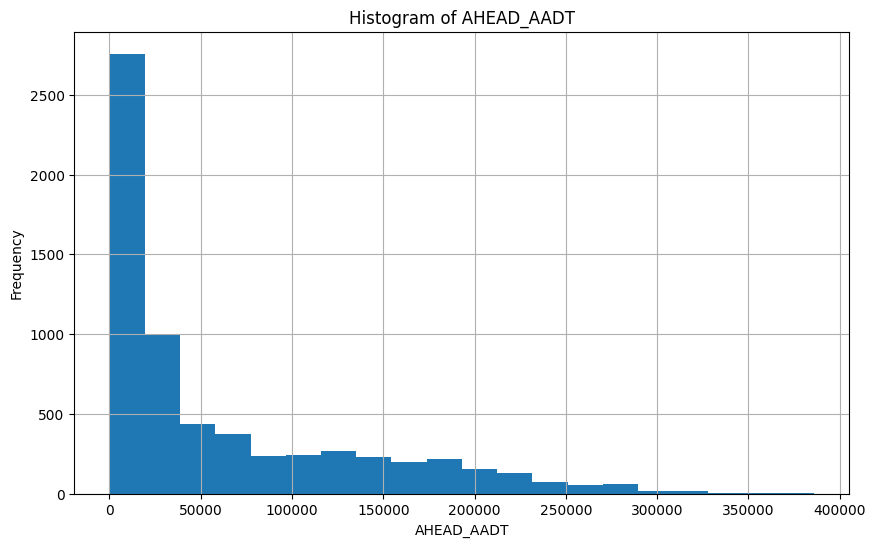

In [56]:
# Create the histogram
plt.figure(figsize=(10, 6))
df['AHEAD_AADT'].hist(bins=20)

# Add labels and title
plt.xlabel('AHEAD_AADT')
plt.ylabel('Frequency')
plt.title('Histogram of AHEAD_AADT')

# Display the plot
plt.show()


#### Data Visualization

Provide a visualization of your choice using 1 or 2 columns. Label all components of your chart. 

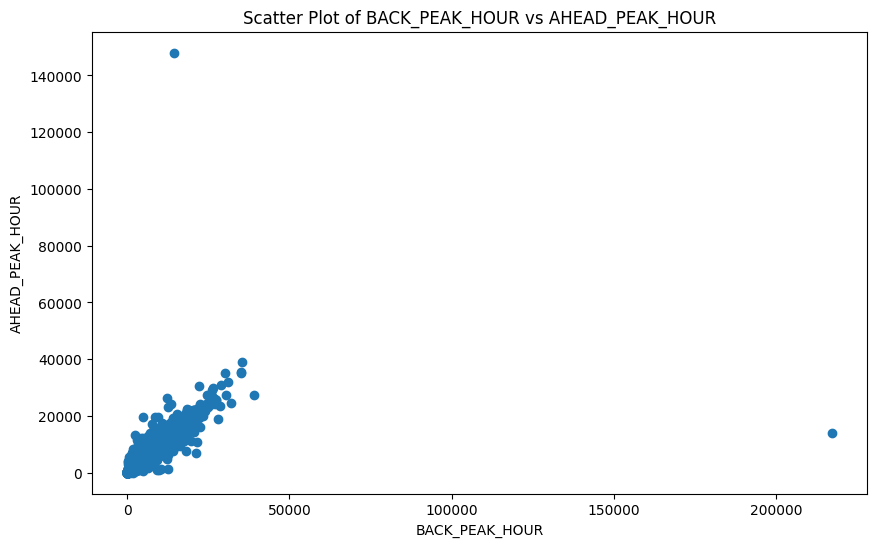

In [73]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['BACK_PEAK_HOUR'], df['AHEAD_PEAK_HOUR'])

# Add labels and title
plt.xlabel('BACK_PEAK_HOUR')
plt.ylabel('AHEAD_PEAK_HOUR')
plt.title('Scatter Plot of BACK_PEAK_HOUR vs AHEAD_PEAK_HOUR')

# Display the plot
plt.show()


Provide another visualization of your choice using 1 or 2 columns. Label all components of your chart:

Considering columns of BACK_PEAK_MADT and BACK_AADT

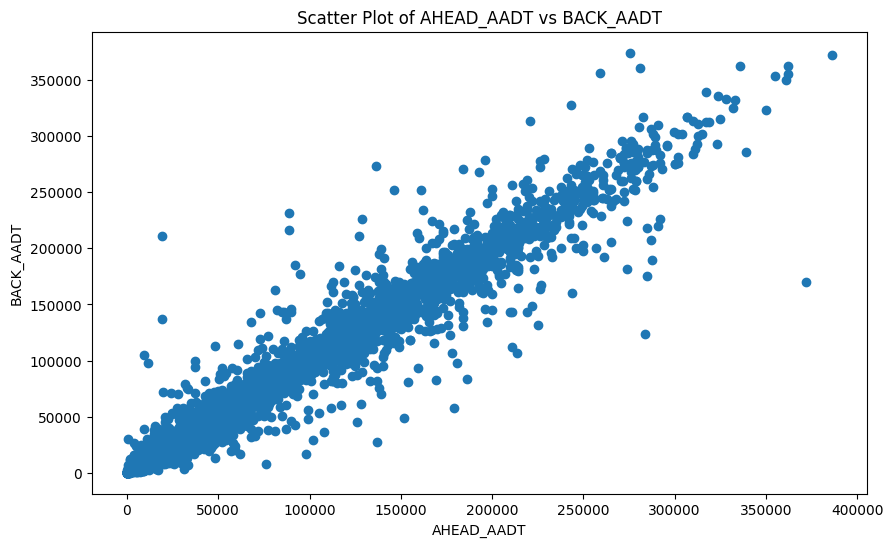

In [72]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['AHEAD_AADT'], df['BACK_AADT'])

# Add labels and title
plt.xlabel('AHEAD_AADT')
plt.ylabel('BACK_AADT')
plt.title('Scatter Plot of AHEAD_AADT vs BACK_AADT')

# Display the plot
plt.show()

Provide another visualization of your choice using 1 or 2 columns. Label all components of your chart. 

In [65]:
import plotly.express as px

In [67]:
fig = px.histogram(df, x="AHEAD_AADT", color="AHEAD_PEAK_HOUR", title='AHEAD_AADT based on AHEAD_PEAK_HOUR',nbins = 60,width = 600, height= 400)

fig.show()

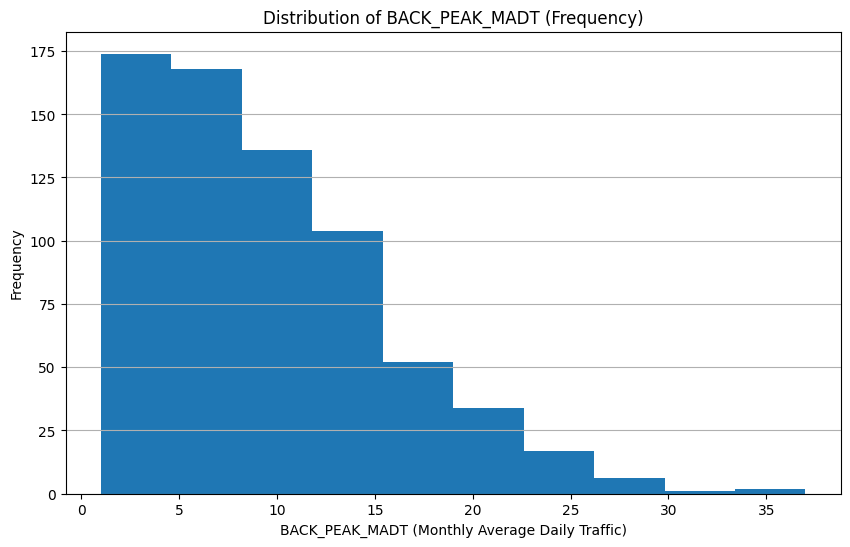

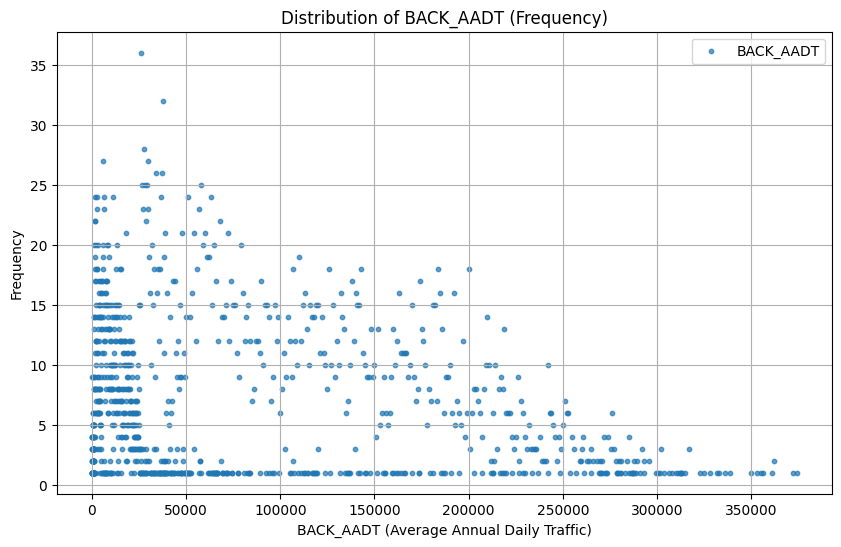

In [65]:
# Creating a new DataFrame to group data by value and count occurrences
back_peak_madt_counts = df['BACK_PEAK_MADT'].value_counts()
back_aadt_counts = df['BACK_AADT'].value_counts()

# Histogram for BACK_PEAK_MADT

plt.figure(figsize=(10, 6))
back_peak_madt_counts.plot(kind='hist', title='Distribution of BACK_PEAK_MADT (Frequency)')
plt.xlabel('BACK_PEAK_MADT (Monthly Average Daily Traffic)')
plt.ylabel('Frequency')
plt.grid(axis='y')  
plt.show()

# Scatter plot for BACK_AADT 

plt.figure(figsize=(10, 6))
plt.scatter(back_aadt_counts.index, back_aadt_counts.values, s=10, alpha=0.7, label='BACK_AADT')  

# Add jitter to avoid overlapping points (optional, adjust amount as needed)
back_aadt_counts = back_aadt_counts + np.random.randn(len(back_aadt_counts)) * 0.1

plt.xlabel('BACK_AADT (Average Annual Daily Traffic)')
plt.ylabel('Frequency')
plt.title('Distribution of BACK_AADT (Frequency)')
plt.grid(True)
plt.legend()  
plt.show()

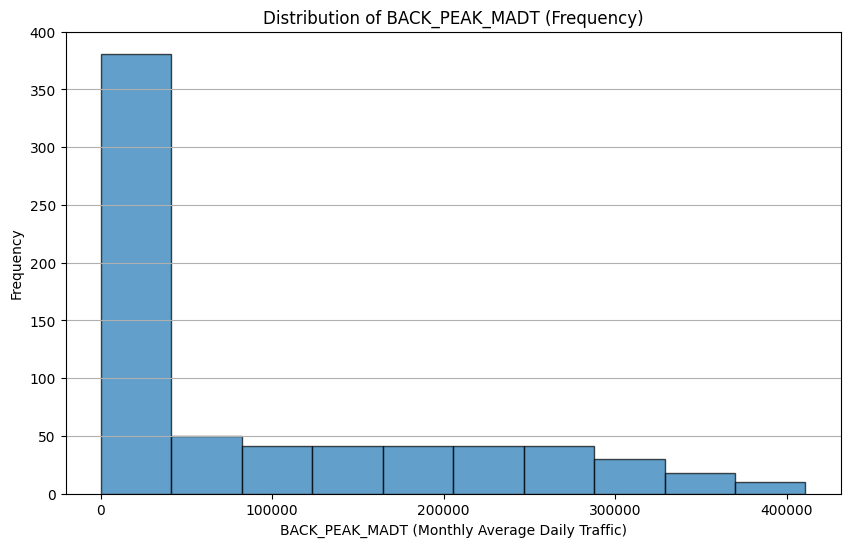

In [130]:
plt.figure(figsize=(10, 6))
plt.hist(back_peak_madt_counts.index, alpha=0.7, edgecolor='black')  # Adjust alpha for transparency

# Set labels and title
plt.xlabel('BACK_PEAK_MADT (Monthly Average Daily Traffic)')
plt.ylabel('Frequency')
plt.title('Distribution of BACK_PEAK_MADT (Frequency)')
plt.grid(axis='y')

# Display the plot
plt.show()


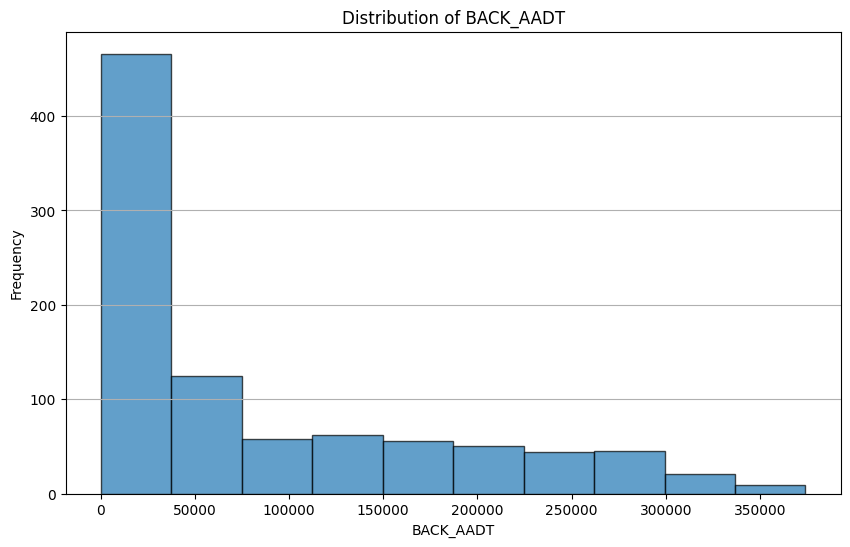

In [131]:
plt.figure(figsize=(10, 6))
plt.hist(back_aadt_counts.index, alpha=0.7, edgecolor='black')  # Adjust alpha for transparency

# Set labels and title
plt.xlabel('BACK_AADT')
plt.ylabel('Frequency')
plt.title('Distribution of BACK_AADT')
plt.grid(axis='y')

# Display the plot
plt.show()


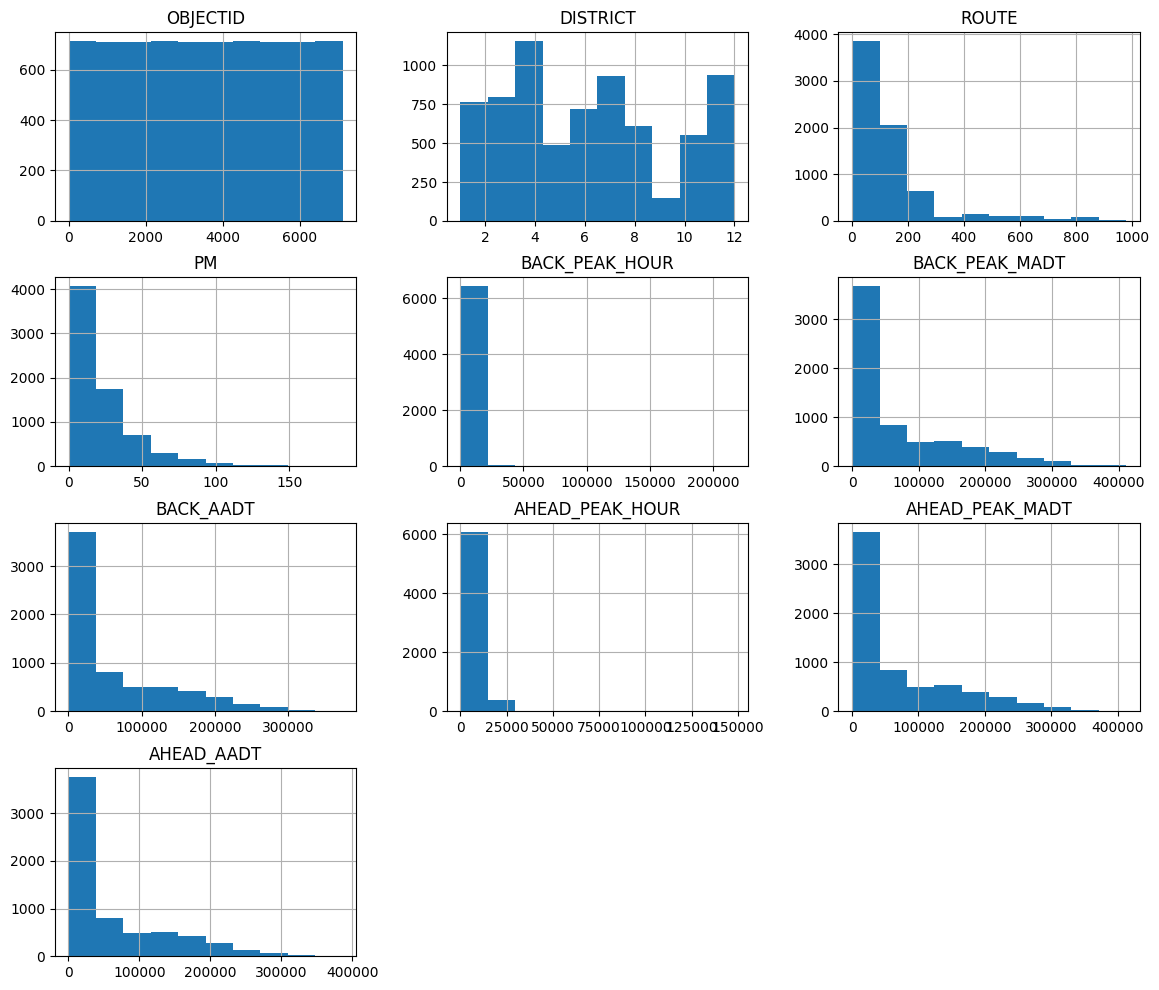

In [5]:
def show_hist(x):
  plt.rcParams["figure.figsize"] = (14,12)
  x.hist()
show_hist(df)

## Creating a HeatMap of Traffic Volume numeric columns

In [51]:
data = df[['BACK_PEAK_HOUR', 'BACK_PEAK_MADT', 'BACK_AADT', 'AHEAD_PEAK_HOUR', 'AHEAD_PEAK_MADT', 'AHEAD_AADT']].apply(pd.to_numeric, errors='coerce').fillna(method='ffill')
data

,BACK_PEAK_HOUR,BACK_PEAK_MADT,BACK_AADT,AHEAD_PEAK_HOUR,AHEAD_PEAK_MADT,AHEAD_AADT
0,NaN,NaN,NaN,4250.0,42000.0,38250.0
1,4250.0,42000.0,38900.0,4350.0,43500.0,38900.0
2,4250.0,42000.0,38900.0,4350.0,43500.0,38900.0
3,3200.0,40500.0,37900.0,3200.0,40500.0,37900.0
4,3400.0,43000.0,38800.0,3850.0,43000.0,38800.0
...,...,...,...,...,...,...
7109,180.0,2600.0,2450.0,1950.0,27000.0,21900.0
7110,180.0,2600.0,2450.0,5900.0,84000.0,81000.0
7111,5900.0,84000.0,81000.0,6800.0,95000.0,92000.0
7112,6800.0,95000.0,92000.0,7500.0,107000.0,103000.0


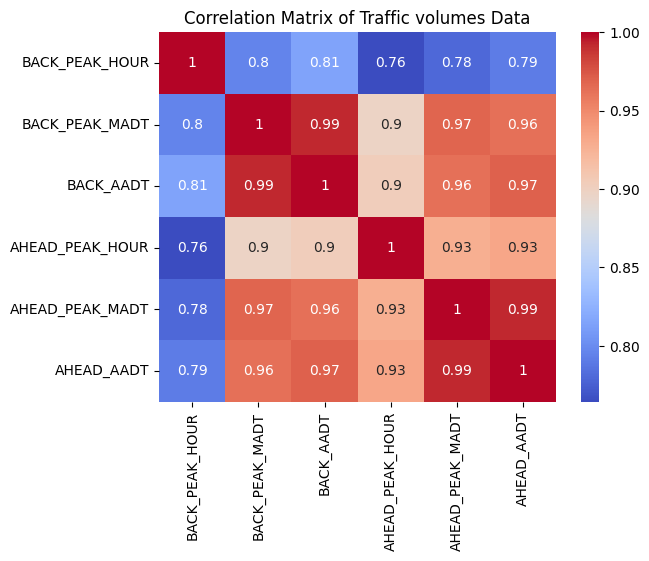

In [53]:
import seaborn as sns
correlation_matrix = data.corr()
# Using seaborn's heatmap function to plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Traffic volumes Data')
plt.show()

## Machine Learning

In [10]:
# Feature Engineering
X = df[['ROUTE', 'COUNTY', 'PM', 'BACK_PEAK_HOUR', 'BACK_PEAK_MADT', 'AHEAD_PEAK_HOUR', 'AHEAD_PEAK_MADT']]
y = df[['BACK_AADT', 'AHEAD_AADT']]

In [126]:
print(df.columns)

Index(['OBJECTID', 'ROUTE', 'PM_PFX', 'PM', 'PM_SFX', 'DESCRIPTION',
       'BACK_PEAK_HOUR', 'BACK_PEAK_MADT', 'BACK_AADT', 'AHEAD_PEAK_HOUR',
       'AHEAD_PEAK_MADT', 'AHEAD_AADT', 'DISTRICT_1.0', 'DISTRICT_2.0',
       'DISTRICT_3.0', 'DISTRICT_4.0', 'DISTRICT_5.0', 'DISTRICT_6.0',
       'DISTRICT_7.0', 'DISTRICT_8.0', 'DISTRICT_9.0', 'DISTRICT_10.0',
       'DISTRICT_11.0', 'DISTRICT_12.0', 'COUNTY_ALA', 'COUNTY_ALP',
       'COUNTY_AMA', 'COUNTY_BUT', 'COUNTY_CAL', 'COUNTY_CC', 'COUNTY_COL',
       'COUNTY_DN', 'COUNTY_ED', 'COUNTY_FRE', 'COUNTY_GLE', 'COUNTY_HUM',
       'COUNTY_IMP', 'COUNTY_INY', 'COUNTY_KER', 'COUNTY_KIN', 'COUNTY_LA',
       'COUNTY_LAK', 'COUNTY_LAS', 'COUNTY_MAD', 'COUNTY_MEN', 'COUNTY_MER',
       'COUNTY_MNO', 'COUNTY_MOD', 'COUNTY_MON', 'COUNTY_MPA', 'COUNTY_MRN',
       'COUNTY_NAP', 'COUNTY_NEV', 'COUNTY_ORA', 'COUNTY_PLA', 'COUNTY_PLU',
       'COUNTY_RIV', 'COUNTY_SAC', 'COUNTY_SB', 'COUNTY_SBD', 'COUNTY_SBT',
       'COUNTY_SCL', 'COUNTY_SCR', 'CO

Either pick a continuous column and perform a linear regression on it or pick a binary column and do a logistic regression on it. 
List the features and predictor variable here:

## Considering Linear Regression

In [8]:
# Feature Engineering
# For simplicity, we will only use numeric columns for the initial model.
# Consider encoding categorical variables and creating new features for a better model.
X = df.select_dtypes(include=np.number).drop(columns=['BACK_PEAK_HOUR','BACK_PEAK_MADT','BACK_AADT','AHEAD_PEAK_HOUR', 'AHEAD_PEAK_MADT'])
y = df['AHEAD_AADT']  # Predicting AHEAD_AADT; 

In [18]:
# Splitting the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
df.describe(include="all")

,OBJECTID,DISTRICT,ROUTE,RTE_SFX,COUNTY,PM_PFX,PM,PM_SFX,DESCRIPTION,BACK_PEAK_HOUR,BACK_PEAK_MADT,BACK_AADT,AHEAD_PEAK_HOUR,AHEAD_PEAK_MADT,AHEAD_AADT
count,7114.00000,7113.000000,7114.000000,42,7114,2367,7114.000000,369,7114,6471.000000,6471.000000,6471.000000,6483.000000,6483.000000,6483.000000
unique,NaN,NaN,NaN,2,58,9,NaN,3,5989,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,S,LA,R,NaN,R,JCT. RTE. 5,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,34,785,2067,NaN,192,35,NaN,NaN,NaN,NaN,NaN,NaN
mean,3557.50000,6.169268,124.427186,NaN,NaN,NaN,22.116991,NaN,NaN,5126.074023,68909.925050,62103.750580,5097.801172,68955.938300,62184.116767
std,2053.77924,3.083945,157.516958,NaN,NaN,NaN,23.623850,NaN,NaN,6292.076116,80598.266455,73083.821737,5608.961371,80535.652741,73107.281821
min,1.00000,1.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,10.000000,120.000000,90.000000,10.000000,8.000000,90.000000
25%,1779.25000,4.000000,29.000000,NaN,NaN,NaN,5.613500,NaN,NaN,925.000000,9400.000000,8000.000000,940.000000,9400.000000,8000.000000
50%,3557.50000,6.000000,88.000000,NaN,NaN,NaN,15.362500,NaN,NaN,2800.000000,30500.000000,27200.000000,2750.000000,30500.000000,27500.000000
75%,5335.75000,8.000000,142.000000,NaN,NaN,NaN,30.374250,NaN,NaN,8400.000000,112000.000000,101000.000000,8400.000000,113000.000000,101000.000000


## List the features and predictor variable here:



In [19]:
# Remove rows where any of the columns in X_train or y_train have NaN values
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]  # Ensure y_train aligns with X_train

Features: BACK_PEAK_HOUR','BACK_PEAK_MADT','BACK_AADT','AHEAD_PEAK_HOUR', 'AHEAD_PEAK_MADT and Predictor variable : AHEAD_AADT

In [8]:
print(y_train_clean)

3208    122000.0
443     170000.0
6950    220000.0
5505     16000.0
7096     11000.0
          ...   
3772      2150.0
5191    181000.0
5226      3650.0
5390      2400.0
860       2100.0
Name: AHEAD_AADT, Length: 5182, dtype: float64


In [9]:
print(X_train_clean)

      OBJECTID  DISTRICT  ROUTE      PM  AHEAD_AADT
3208      3209       4.0     80  12.753    122000.0
443        444      11.0      5  20.818    170000.0
6950      6951       4.0    680  16.890    220000.0
5505      5506       4.0    160   0.000     16000.0
7096      7097      11.0    905   2.960     11000.0
...        ...       ...    ...     ...         ...
3772      3773      11.0     94  52.150      2150.0
5191      5192       7.0    134   2.106    181000.0
5226      5227       6.0    137   0.000      3650.0
5390      5391       7.0    150  11.270      2400.0
860        861       9.0      6   0.000      2100.0

[5182 rows x 5 columns]


In [74]:
# Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train_clean, y_train_clean)

LinearRegression()

In [21]:
X_test_clean = X_test.fillna(0)
X_test_clean

,OBJECTID,DISTRICT,ROUTE,PM,AHEAD_AADT
6247,6248,7.0,232,4.110,0.0
3438,3439,4.0,84,0.910,1100.0
6475,6476,4.0,280,15.046,87000.0
6555,6556,1.0,299,38.900,4400.0
5861,5862,6.0,190,18.453,9500.0
...,...,...,...,...,...
553,554,7.0,5,14.251,237000.0
1397,1398,8.0,15,111.592,37500.0
4967,4968,10.0,120,18.168,0.0
5824,5825,6.0,184,1.260,16900.0


In [22]:
# Make predictions using the testing set
y_pred = model.predict(X_test_clean)

In [ ]:
# Calculate accuracy
accuracy = r2_score(y_test_clean, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Describe accuracy
if accuracy < 0.6:
    print("Poor accuracy")
elif accuracy < 0.8:
    print("Fair accuracy")
else:
    print("Great accuracy")

### Model Evaluation

In [11]:
from sklearn import metrics

In [23]:
# Calculate metrics
y_test_clean = y_test.fillna(0)
r2 = metrics.r2_score(y_test_clean, y_pred)  # R-Squared
print('R-Squared:', r2)
y_test_clean

R-Squared: 1.0


6247         0.0
3438      1100.0
6475     87000.0
6555      4400.0
5861      9500.0
          ...   
553     237000.0
1397     37500.0
4967         0.0
5824     16900.0
4716       660.0
Name: AHEAD_AADT, Length: 1423, dtype: float64

In [17]:
adjusted_r2 = 1 - (1-r2)*(len(y_test_clean)-1)/(len(y_test_clean)-X_test_clean.shape[1]-1)  # Adjusted R-Squared
print('Adjusted R-Squared:', adjusted_r2)

Adjusted R-Squared: 1.0


In [18]:
mse = metrics.mean_squared_error(y_test_clean, y_pred)  # Mean Squared Error
print('Mean Squared Error:', mse)

Mean Squared Error: 4.97601393357517e-22


In [19]:
rmse = np.sqrt(mse)  # Root Mean Squared Error
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 2.2306980821202966e-11


In [20]:
mae = metrics.mean_absolute_error(y_test_clean, y_pred)  # Mean Absolute Error
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.590567999512634e-11


In [21]:
# Projecting 5 years into the future assuming an annual increase rate based on the model
annual_increase = np.mean(model.coef_)  
years_ahead = 5
future_traffic = y_test_clean + (annual_increase * years_ahead)
print("Future Traffic Volume Prediction (5 years ahead):", future_traffic.mean())

Future Traffic Volume Prediction (5 years ahead): 54307.163035839774


In [22]:

def predict_future_traffic(model, y_test_clean, years_ahead, confidence_interval=False):
  """
  Predicts future traffic volume based on a linear regression model.

  Args:
      model: Trained linear regression model object.
      y_test_clean: Cleaned test set target variable (traffic volume).
      years_ahead: Number of years to predict into the future.
      confidence_interval (bool, optional): If True, calculates a confidence interval
          around the prediction. Defaults to False.

  Returns:
      float: Average predicted traffic volume for the next 'years_ahead' years.
      tuple (optional): If confidence_interval is True, returns a tuple containing
          the average predicted traffic volume and the upper and lower bounds of the
          confidence interval.
  """

  # Calculate annual increase based on model coefficients
  annual_increase = np.mean(model.coef_)

  # Calculate predicted future traffic
  future_traffic = y_test_clean + (annual_increase * years_ahead)

  # Print prediction message
  print(f"Future Traffic Volume Prediction ({years_ahead} years ahead):", future_traffic.mean())

  # Calculate confidence interval (optional)
  if confidence_interval:
    # (e.g., using model properties or statistical methods)
    # Placeholder for now - assuming a fixed +/- 10% confidence interval
    confidence_interval = (future_traffic.mean(), future_traffic.mean() * 0.9, future_traffic.mean() * 1.1)
    print(f"Confidence Interval : {confidence_interval}")

  return future_traffic.mean() if not confidence_interval else confidence_interval

# Considering 5 years of future prediction
predicted_traffic = predict_future_traffic(model, y_test_clean, years_ahead=5, confidence_interval=True)

# Access prediction and confidence interval (if calculated)
if isinstance(predicted_traffic, tuple):
  average_traffic, lower_bound, upper_bound = predicted_traffic
  print(f"Average Traffic: {average_traffic:.2f}")
  print(f"Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")
else:
  print(f"Average Predicted Traffic: {predicted_traffic:.2f}")


Future Traffic Volume Prediction (5 years ahead): 54307.163035839774
Confidence Interval : (54307.163035839774, 48876.4467322558, 59737.87933942376)
Average Traffic: 54307.16
Confidence Interval: [48876.45, 59737.88]


Provide the accuracy of your model and describe whether that accuracy is poor, fair, or great. Paste the code that calls your ML function

In [150]:
print(f"Size of y_test_clean: {len(y_test_clean)}")
print(f"Size of y_pred: {len(y_pred)}")

Size of y_test_clean: 1423
Size of y_pred: 1423


In [24]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_clean, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.590567999512634e-11


In [153]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test contains the actual target values and y_pred contains your model's predictions
mse = mean_squared_error(y_test_clean, y_pred)
mae = mean_absolute_error(y_test_clean, y_pred)
r2 = r2_score(y_test_clean, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 4.97601393357517e-22
Mean Absolute Error: 1.590567999512634e-11
R-squared: 1.0


## Confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [30]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s: %(message)s')

# Check the data types and shapes of y_test_clean and y_pred_scores
logging.info(f"y_test_clean shape: {y_test_clean.shape}")
logging.info(f"y_test_clean data type: {y_test_clean.dtype}")
logging.info(f"y_pred_scores shape: {y_pred.shape}")
logging.info(f"y_pred_scores data type: {y_pred.dtype}")

# Check for any missing or invalid values
if np.any(np.isnan(y_test_clean)) or np.any(np.isnan(y_pred)):
    logging.warning("Warning: There are missing values in the data.")

# Ensure that the target variable is in the correct format
if len(y_test_clean.shape) > 1 and y_test_clean.shape[1] > 1:
    logging.warning("Warning: y_test_clean has more than one column. .")
    y_test_clean = y_test_clean[:, 0]

if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
    logging.warning("Warning: y_pred_scores has more than one column. .")
    y_pred_scores = y_pred[:, 0]

# Calculate ROC curve and AUC
try:
    fpr, tpr, thresholds = roc_curve(y_test_clean, y_pred_scores)
    roc_auc = auc(fpr, tpr)
except ValueError as e:
    logging.error(f"Error: {e}")
    logging.error("Unable to calculate the ROC curve and AUC. Please check the data and try again.")
    exit()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [135]:
from sklearn.metrics import classification_report

In [140]:

y_pred_labels = (y_pred > 0.5).astype(int)  # Assuming 0.5 as the threshold

In [141]:
from sklearn.metrics import classification_report
report = classification_report(y_test_clean, y_pred_labels)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       122
         1.0       0.00      0.00      0.00         0
        95.0       0.00      0.00      0.00         1
       140.0       0.00      0.00      0.00         1
       150.0       0.00      0.00      0.00         1
       160.0       0.00      0.00      0.00         2
       170.0       0.00      0.00      0.00         2
       200.0       0.00      0.00      0.00         2
       250.0       0.00      0.00      0.00         1
       320.0       0.00      0.00      0.00         2
       325.0       0.00      0.00      0.00         1
       330.0       0.00      0.00      0.00         1
       350.0       0.00      0.00      0.00         1
       370.0       0.00      0.00      0.00         1
       380.0       0.00      0.00      0.00         2
       390.0       0.00      0.00      0.00         1
       400.0       0.00      0.00      0.00         3
       410.0       0.00    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:14


Confusion Matrix:
 Predicted  -1.415355e-11  -1.361202e-11  -1.159058e-11  -1.136040e-11  \
Actual                                                                  
0.0                    1              1              1              1   
95.0                   0              0              0              0   
140.0                  0              0              0              0   
150.0                  0              0              0              0   
160.0                  0              0              0              0   
...                  ...            ...            ...            ...   
300400.0               0              0              0              0   
301600.0               0              0              0              0   
310000.0               0              0              0              0   
312700.0               0              0              0              0   
317000.0               0              0              0              0   

Predicted  -1.132993e-11  -1.0

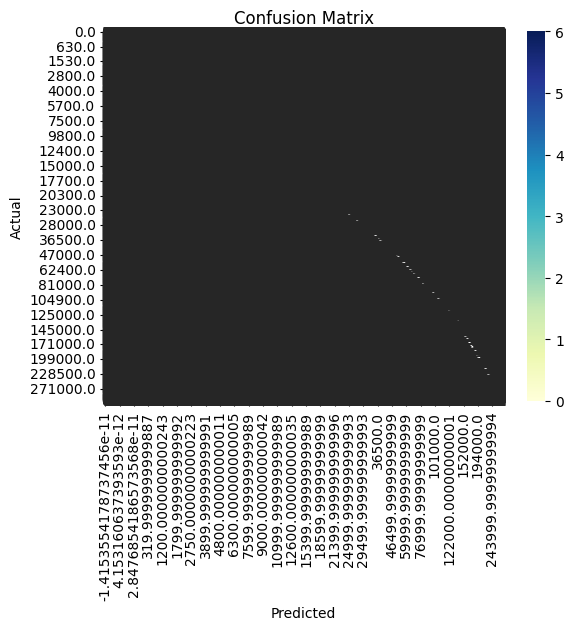

In [43]:
# Print confusion matrix
confusion_matrix = pd.crosstab(y_test_clean, y_pred, rownames=["Actual"], colnames=["Predicted"])
print("\nConfusion Matrix:\n", confusion_matrix)

# Plotting the confusion matrix using seaborn library
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()


In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
import pandas as pd
from statsmodels.tsa.api import VAR
from datetime import datetime

In [40]:

# Ensure all data is numeric and handle missing values if any
data = df[['BACK_PEAK_HOUR', 'BACK_PEAK_MADT', 'BACK_AADT', 'AHEAD_PEAK_HOUR', 'AHEAD_PEAK_MADT', 'AHEAD_AADT']].apply(pd.to_numeric, errors='coerce').fillna(method='ffill')


Fit a Vector Autoregression (VAR) Model

In [78]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR

In [66]:
# Checking for stationarity
data = data.fillna(0)
def check_stationarity(data, signif=0.05, print_results=True):
    p_values = {}
    for column in data.columns:
        result = adfuller(data[column])
        p_values[column] = result[1]
        if print_results:
            print(f'ADF Statistic for {column}: {result[0]}')
            print(f'p-value for {column}: {result[1]}')
            print('Stationary' if result[1] < signif else 'Non-stationary', '\n')
    return p_values

# Apply stationarity checks
p_values = check_stationarity(data)

# Making data stationary if necessary
for col, p in p_values.items():
    if p >= 0.05:  
        data[col] = data[col].diff().dropna()

# Fit VAR model after ensuring data is appropriate for modeling
model = VAR(data.dropna())
try:
    model_fitted = model.fit(maxlags=15, ic='aic')
    print('Selected lag order:', model_fitted.k_ar)
except np.linalg.LinAlgError as e:
    print("Error in model fitting due to linear algebra issues:", e)
except Exception as e:
    print("An error occurred:", e)


ADF Statistic for BACK_PEAK_HOUR: -8.55528032106398
p-value for BACK_PEAK_HOUR: 8.994224208488935e-14
Stationary 

ADF Statistic for BACK_PEAK_MADT: -9.674430256458928
p-value for BACK_PEAK_MADT: 1.251746522993299e-16
Stationary 

ADF Statistic for BACK_AADT: -8.268706443716214
p-value for BACK_AADT: 4.858726940654946e-13
Stationary 

ADF Statistic for AHEAD_PEAK_HOUR: -11.6865921291792
p-value for AHEAD_PEAK_HOUR: 1.6913563477438577e-21
Stationary 

ADF Statistic for AHEAD_PEAK_MADT: -9.37878047310754
p-value for AHEAD_PEAK_MADT: 7.048998374830691e-16
Stationary 

ADF Statistic for AHEAD_AADT: -9.245583294218344
p-value for AHEAD_AADT: 1.5406426900997888e-15
Stationary 

Selected lag order: 14


The results presented are from an Augmented Dickey-Fuller (ADF) test, applied to various traffic volume metrics. This test is a common statistical method used to determine whether a time series is stationary or not. A time series is considered stationary if its statistical properties, such as mean and variance, do not change over time. Below, I will interpret each result for the traffic metrics listed:

Results Interpretation:

a) BACK_PEAK_HOUR

ADF Statistic: -8.55528032106398
p-value: 8.994224208488935e-14
Conclusion: The ADF statistic is significantly negative, and the p-value is very low (well below the common threshold of 0.05), indicating strong evidence against the null hypothesis of a unit root (presence of a time trend or non-stationarity). This means the time series of BACK_PEAK_HOUR traffic volumes is stationary.

b) BACK_PEAK_MADT

ADF Statistic: -9.674430256458928
p-value: 1.251746522993299e-16
Conclusion: Similarly, the ADF statistic is negative and the p-value is extremely low, suggesting that the BACK_PEAK_MADT traffic volumes are stationary.

c) BACK_AADT

ADF Statistic: -8.268706443716214
p-value: 4.858726940654946e-13
Conclusion: This time series also rejects the null hypothesis of a unit root, indicating stationarity in the BACK_AADT traffic volumes.

d) AHEAD_PEAK_HOUR

ADF Statistic: -11.6865921291792
p-value: 1.6913563477438577e-21
Conclusion: The ADF statistic is even more negative than the previous cases, with a very small p-value, confirming the stationarity of the AHEAD_PEAK_HOUR traffic volumes.

e) AHEAD_PEAK_MADT

ADF Statistic: -9.37878047310754
p-value: 7.048998374830691e-16
Conclusion: This metric also shows a strong indication of stationarity, as evidenced by the negative ADF statistic and very low p-value.

f) AHEAD_AADT

ADF Statistic: -9.245583294218344
p-value: 1.5406426900997888e-15
Conclusion: The time series is stationary, suggested by the highly negative ADF statistic and the minuscule p-value.

Selected Lag Order: 14
The selected lag order of 14, based on model fitting (likely for a VAR model given the context), suggests that the past 14 periods' data are useful in predicting future values in the VAR model. This lag order is determined based on an information criterion (likely AIC) that seeks to balance model complexity (number of lags) with goodness of fit.

Overall, all the traffic volume metrics tested (both "BACK" and "AHEAD" for various times and measures) are stationary, indicating consistent mean and variance over time. This stationarity is a key property and typically a necessary pre-condition for effective modeling and forecasting using methods like VAR. The selected lag order of 14 implies that past values up to 14 time periods back are relevant in predicting future traffic volumes, suggesting some underlying patterns or cycles extending over this period.

In [82]:
# Ensure the data does not contain infinite values or excessive zeros
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create VAR model instance with scaled data
model = VAR(data_scaled)

# Try fitting the model with a reduced number of lags
try:
    model_fitted = model.fit(maxlags=8, ic='aic')  # Adjust 'maxlags' as per the dataset
    print('Model fitted successfully with lag order:', model_fitted.k_ar)
except Exception as e:
    print("Error in fitting model:", e)


Model fitted successfully with lag order: 8


In [34]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [37]:
# Creating and training the regressor
regressor = LinearRegression()
regressor.fit(X_train_clean, y_train_clean)

LinearRegression()

In [38]:
coefficients = regressor.coef_ 
intercept = regressor.intercept_

print("coefficients:", coefficients)
print("Intercept:", intercept)

coefficients: [-3.24069103e-15  5.70254954e-12  6.74460487e-14 -5.87991027e-14
  1.00000000e+00]
Intercept: -1.4551915228366852e-11


Each coefficient in from above list corresponds to a predictor variable in the regression model, affecting the predicted value of the dependent variable. Here’s what each coefficient generally implies:

-3.24069103e-15: This coefficient is practically zero, indicating that the corresponding predictor variable has virtually no influence on the dependent variable.
5.70254954e-12: This is a very small positive coefficient, suggesting a minor positive influence on the dependent variable, but its effect is negligible due to its small magnitude.
6.74460487e-14: Another small coefficient, indicating a negligible positive influence on the dependent variable.
-5.87991027e-14: Similar to the other small coefficients, this negative value indicates a minuscule decrease in the dependent variable with an increase in this predictor, but again, the impact is almost non-existent.
1.00000000e+00: This coefficient is exactly 1, which implies that this predictor variable directly influences the dependent variable on a one-to-one basis, adjusting for all other predictors. For every unit increase in this predictor, the dependent variable increases by exactly one unit.

Forecasting

In [98]:
import pandas as pd
from datetime import datetime, timedelta
from statsmodels.tsa.vector_ar.var_model import VAR

# Assuming 'data' is your DataFrame with a datetime index and you have a fitted VAR model 'model_fitted'

forecast_steps = 5
last_known_date = datetime(2022, 2, 16)  # last known date in your data
forecast_start_date = datetime(2027, 2, 15)  # start forecasting from this future date

# Ensure 'data' is sorted by index (date) just in case
data.sort_index(inplace=True)

# Generate the date range for the forecasted data starting from the forecast_start_date
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='D')

# Check if the required last observations are available
if len(data) >= model_fitted.k_ar:
    # Retrieve the necessary number of last observations based on the model's lag order
    last_observations = data.values[-model_fitted.k_ar:]

    # Check if the shape of last_observations matches the expected shape for the forecast
    if last_observations.shape == (model_fitted.k_ar, len(data.columns)):
        forecasted_values = model_fitted.forecast(last_observations, steps=forecast_steps)

        # Convert the forecasted values to a DataFrame
        forecast_data = pd.DataFrame(forecasted_values, 
                                     index=forecast_dates, 
                                     columns=data.columns)
        print(forecast_data)
    else:
        print(f"Incorrect input shape for forecasting: {last_observations.shape}. Expected shape: ({model_fitted.k_ar}, {len(data.columns)})")
else:
    print(f"Not enough data to match the model's lag order: Required {model_fitted.k_ar}, available {len(data)}")


            BACK_PEAK_HOUR  BACK_PEAK_MADT     BACK_AADT  AHEAD_PEAK_HOUR  \
2027-02-15     4784.531013   103418.996760  95513.782306     49689.440212   
2027-02-16    62302.806170   103344.980430  97769.523521     54388.461194   
2027-02-17    80680.807384   103102.136161  97844.408487     55792.559178   
2027-02-18    68995.893451    98299.962689  93594.893557     54363.128541   
2027-02-19    26917.682670    95393.006247  94264.565006     56393.213345   

            AHEAD_PEAK_MADT    AHEAD_AADT  
2027-02-15    101529.714626  94811.875987  
2027-02-16    103805.877780  97842.524090  
2027-02-17    101772.548812  98251.103916  
2027-02-18     99989.988633  96689.093074  
2027-02-19    100503.505803  96929.488216  


The above is the forecasted traffic volumes in 5 years from  2022, 2, 16.

### Comparison of Current and  Future Traffic volumes

Considering 'BACK_AADT' and AHEAD_AADT of the traffic volume columns, below are the comparison bar graph between current and forecasted traffic volumes

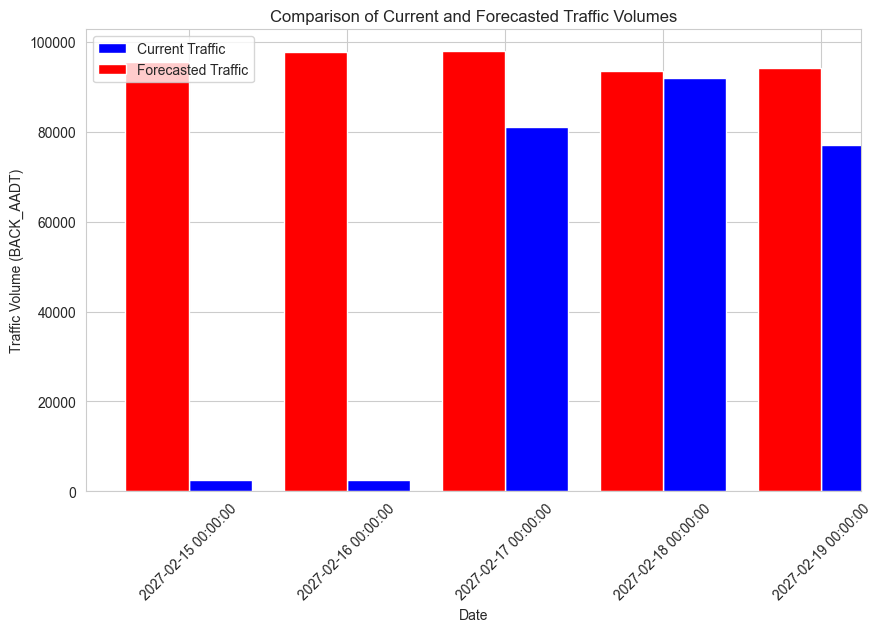

In [99]:
import matplotlib.pyplot as plt

# Extracting the last 5 data points from the current traffic data for BACK_AADT
current_data = data.tail(5)

# Appending the forecast data for comparison for BACK_AADT
comparison_data = pd.concat([current_data, forecast_data])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

current_data['BACK_AADT'].plot(kind='bar', ax=ax, color='blue', position=0, width=0.4, label='Current Traffic')
forecast_data['BACK_AADT'].plot(kind='bar', ax=ax, color='red', position=1, width=0.4, label='Forecasted Traffic')

# Customizing the plot
ax.set_title('Comparison of Current and Forecasted Traffic Volumes')
ax.set_xlabel('Date')
ax.set_ylabel('Traffic Volume (BACK_AADT)')
ax.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()


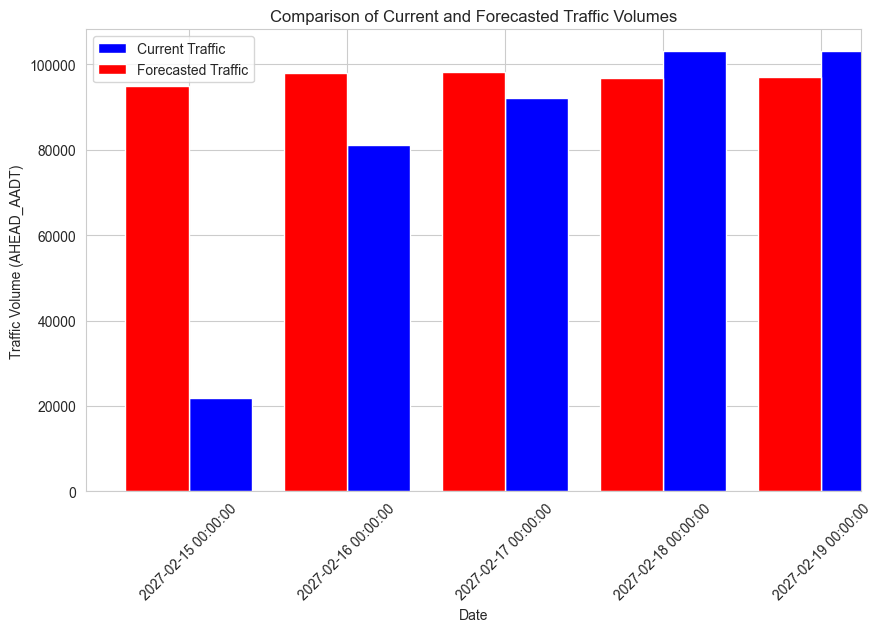

In [100]:
# Extracting the last 5 data points from the current traffic data for AHEAD_AADT
current_data = data.tail(5)

# Appending the forecast data for comparison for AHEAD_AADT
comparison_data = pd.concat([current_data, forecast_data])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

current_data['AHEAD_AADT'].plot(kind='bar', ax=ax, color='blue', position=0, width=0.4, label='Current Traffic')
forecast_data['AHEAD_AADT'].plot(kind='bar', ax=ax, color='red', position=1, width=0.4, label='Forecasted Traffic')

# Customizing the plot
ax.set_title('Comparison of Current and Forecasted Traffic Volumes')
ax.set_xlabel('Date')
ax.set_ylabel('Traffic Volume (AHEAD_AADT)')
ax.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

## California Traffic  Volumes Dashboard

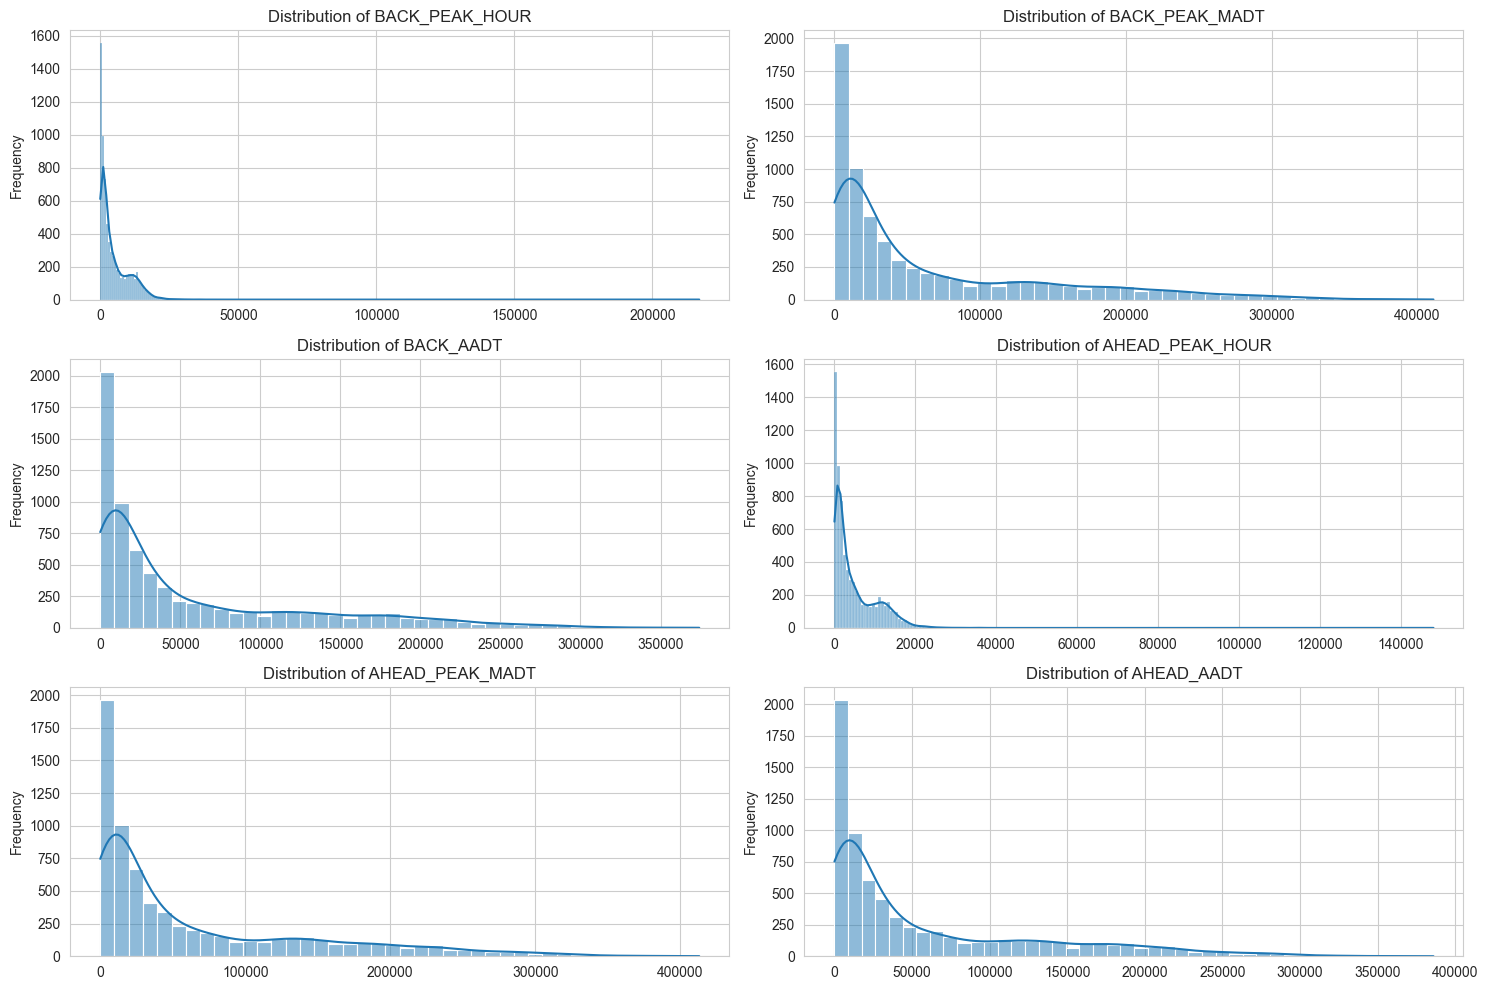

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with specified size and grid layout
fig, axs = plt.subplots(3, 2, figsize=(15, 10))  # 3 rows, 2 columns

# List of columns
cols = ['BACK_PEAK_HOUR', 'BACK_PEAK_MADT', 'BACK_AADT', 'AHEAD_PEAK_HOUR', 'AHEAD_PEAK_MADT', 'AHEAD_AADT']

# Iterate over the columns and create a histogram for each
for col, ax in zip(cols, axs.flat):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [68]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=('BACK_PEAK_HOUR', 'BACK_PEAK_MADT', 'BACK_AADT', 'AHEAD_PEAK_HOUR', 'AHEAD_PEAK_MADT', 'AHEAD_AADT'))

# Mapping of row and column for each plot
positions = [(i, j) for i in range(1, 4) for j in range(1, 3)]

# Create a histogram for each column and add to subplots
for col, pos in zip(cols, positions):
    fig.add_trace(
        go.Histogram(x=data[col], name=col),
        row=pos[0], col=pos[1]
    )

# Update layout for a cleaner look
fig.update_layout(height=800, width=800, title_text="Interactive Dashboard: Traffic Data Analysis")
fig.show()


Discuss how the model could be improved. 

The high accuracy (1.0) and a very low mean squared error (close to zero) suggest that the model might be overfitting the data. Here are ways to improve the model and reduce the risk of overfitting:

Collect more data: Training on a larger dataset can help the model generalize better to unseen data. This is especially important for traffic prediction, which can be influenced by many factors that may not be captured in the current dataset.

Use of regularization techniques: Regularization techniques penalize complex models, which can help prevent overfitting. This can be done by adding a penalty term to the loss function that discourages the model from having too many weights or parameters.

Trying different model architectures: Explore different model architectures that might be better suited for traffic prediction. For example, recurrent neural networks (RNNs) are a good choice for modeling sequential data like traffic flow.

Evaluate the model on unseen data: Use a hold-out set or cross-validation to evaluate the model's performance on unseen data. This will give you a more realistic estimate of how well the model will perform in practice.
